#Desafío 1 : hora de la práctica

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [23]:
import pandas as pd
datos = pd.read_csv('/content/diabetes.csv')

datos

glicemia  presion_sanguinea  grasa_subcutanea_triceps  insulina    imc  \
0          66                 23                        94      28.1  0.167   
1          40                 35                       168      43.1  2.288   
2          50                 32                        88      31.0  0.248   
3          70                 45                       543      30.5  0.158   
4          60                 23                       846      30.1  0.398   
..        ...                ...                       ...       ...    ...   
389        88                 44                       510      43.3  0.222   
390        88                 39                       110      36.5  1.057   
391        58                 26                        16      28.4  0.766   
392        76                 48                       180      32.9  0.171   
393        72                 23                       112      26.2  0.245   

     diabetes  
0           0  
1           1  
2           1  
3           1  
4           1  
..        ...  
389         1  
390         1  
391         0  
392         0  
393         0  

[394 rows x 6 columns]

In [24]:
X = datos.drop(columns = 'diabetes', axis=1)
y = datos.diabetes

In [25]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [26]:
from sklearn.model_selection import train_test_split #separa los valores

X, X_test, y, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5) #Tiene el 25% predeterminado

3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño.

Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

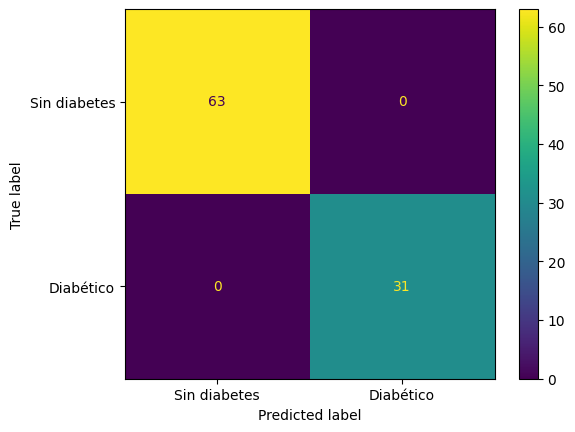

In [27]:
import sklearn.metrics as confusion_matrix
import sklearn.metrics as ConfusionMatrixDisplay

y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix.confusion_matrix(y_val, y_previsto)

visualizacion = ConfusionMatrixDisplay.ConfusionMatrixDisplay(matriz_confusion, display_labels=['Sin diabetes','Diabético'])
visualizacion.plot();

In [28]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrevamiento es de {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrevamiento es de 0.7571428571428571
La exactitud del modelo con el conjunto de validación es de 0.776595744680851


In [29]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7321428571428571
Precisión de validación: 0.6808510638297872


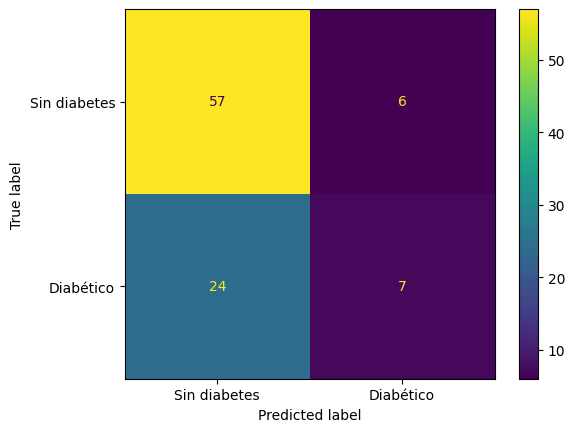

In [30]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix.confusion_matrix(y_val, y_previsto)

visualizacion = ConfusionMatrixDisplay.ConfusionMatrixDisplay(matriz_confusion, display_labels=['Sin diabetes','Diabético'])
visualizacion.plot();


Desafío 2 : hora de la práctica

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.



In [31]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'La precisión del modelo es de {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es de {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es de {accuracy_score(y_val, y_previsto)}')
print(f'El F1 del modelo es de {f1_score(y_val, y_previsto)}')

La precisión del modelo es de 0.5384615384615384
La sensibilidad (Recall) del modelo es de 0.22580645161290322
La exactitud (accuracy) del modelo es de 0.6808510638297872
El F1 del modelo es de 0.3181818181818182


2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra.

Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

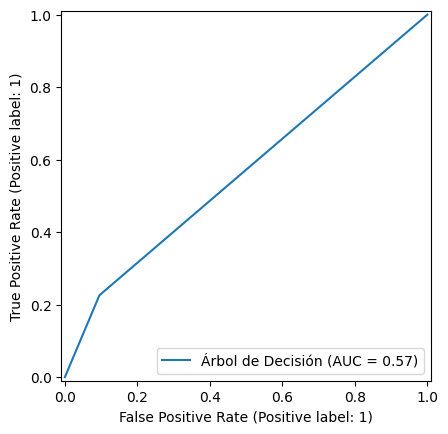

In [32]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de Decisión');

In [33]:
from sklearn.metrics import roc_auc_score
print(f'El área bajo la burva ROC es: {roc_auc_score(y_val, y_previsto)}')

El área bajo la burva ROC es: 0.565284178187404


3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

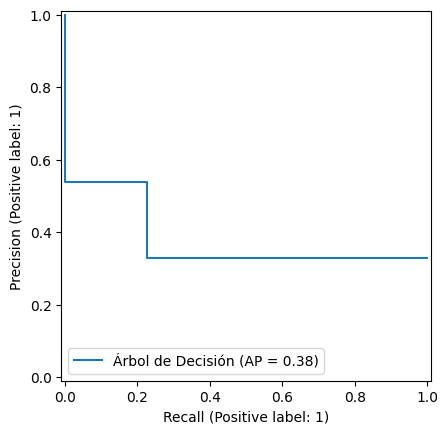

In [34]:
from sklearn.metrics import PrecisionRecallDisplay,average_precision_score

PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de Decisión');

In [35]:
print(f'El score promedio de precision vs recl es: {average_precision_score(y_val, y_previsto)}')

El score promedio de precision vs recl es: 0.376907238266195


4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        63
           1       0.54      0.23      0.32        31

    accuracy                           0.68        94
   macro avg       0.62      0.57      0.55        94
weighted avg       0.65      0.68      0.64        94



Desafío 3: hora de la práctica

1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas.

Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar.

El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar.

In [37]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo.

El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

In [38]:
from sklearn.model_selection import cross_val_score, KFold

arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = kf)
resultado_rf = cross_val_score(random_forest, X, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confianza (Random Forest): [0.5977140282562093, 0.7973073088703909]


3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente.

Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, X, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.2681981750463088, 0.7354166140441551]
Intervalo de confianza (Random Forest): [0.07323647309798545, 0.5707801861973115]


4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos.

El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

In [40]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, X, y, cv = loo)
resultado_rf = cross_val_score(random_forest, X, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}')

Precisión media (Decision Tree): 0.7085561497326203
Precisión media (Random Forest):0.6737967914438503


# Desafío 4: hora de la práctica

1 - El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos.

La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, utilizando el método value_counts(normalize=True) o con la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca seaborn para entender si hay un desbalanceo de datos.

In [41]:
datos['diabetes'].value_counts(normalize = True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

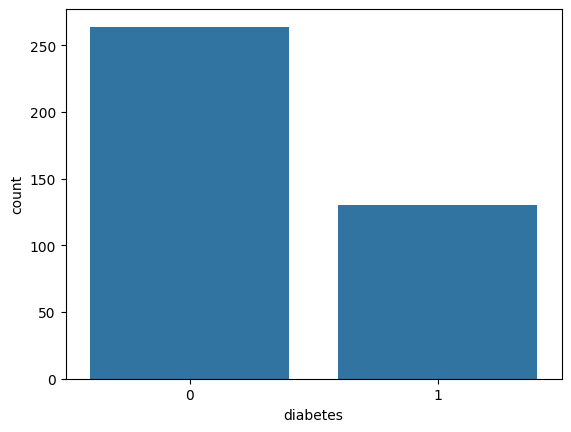

In [42]:
import seaborn as sns
sns.countplot(datos, x = 'diabetes');

2 - Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

In [45]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_validate

In [49]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()),('arbol', modelo)])
skf =StratifiedKFold(n_splits=5, shuffle=True, random_state=5) #shffle que se mezcle
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='f1')

intervalo_conf(cv_resultados['test_score'], 'Decision Tree')

Intervalo de confianza (Decision Tree): [0.32860316515512794, 0.6945770331212926]


In [55]:
modelo = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', modelo)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'f1')

intervalo_conf(cv_resultados['test_score'], 'Decision Tree')

Intervalo de confianza (Decision Tree): [0.5007770649987031, 0.7319462101389504]


3 - Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

In [57]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5449681473471796


In [58]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.5986110126432707


4 - Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en seleccionar el modelo con mejor rendimiento y hacer la evaluación final en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. Realiza la evaluación del modelo usando los datos de prueba que fueron separados al inicio de los desafíos, obteniendo el informe de métricas y matriz de confusión.

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.55      0.86      0.67         7

    accuracy                           0.70        20
   macro avg       0.72      0.74      0.70        20
weighted avg       0.77      0.70      0.71        20



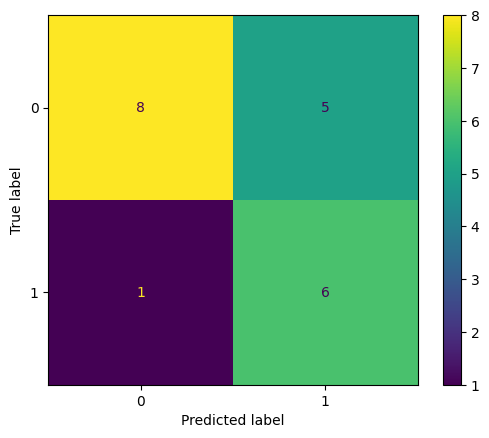

In [61]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))

matriz_confusion = confusion_matrix.confusion_matrix(y_test, y_previsto)
ConfusionMatrixDisplay.ConfusionMatrixDisplay(matriz_confusion).plot();